In [18]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [19]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

In [20]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['FUC', 'NDG']
di_sugar2= ['LFucpa', 'DGlcpNAca']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [21]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [22]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [23]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [24]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [25]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [26]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 8 
valid torsion1 and torsion2: (8, 8)


In [27]:
instant1.calc_BFactor()

In [28]:
instant1.find_bfmp_ring_shape()

(['3.D', '1.D'], ['1C4', '4C1'])
(['3.C', '1.C'], ['1C4', '4C1'])
(['3.D', '1.D'], ['1C4', '4C1'])
(['4.C', '1.C'], ['1C4', '4C1'])
(['4.D', '1.D'], ['1C4', '4C1'])
(['4.B', '1.B'], ['1C4', '4C1'])
(['4.C', '1.C'], ['1C4', '4C1'])
(['4.D', '1.D'], ['1C4', '4C1'])


In [29]:
output_df = instant1.match_glycan_tree()

../../pdbs//4rm0.pdb D FUC 3 C1
../../pdbs//4rm0.pdb D NDG 1 O4
4798 4782
Connection found between 4798 and 4782
../../pdbs//4wzl.pdb C FUC 3 C1
../../pdbs//4wzl.pdb C NDG 1 O4
9319 9303
Connection found between 9319 and 9303
../../pdbs//4wzl.pdb D FUC 3 C1
../../pdbs//4wzl.pdb D NDG 1 O4
9355 9339
Connection found between 9355 and 9339
../../pdbs//4rdk.pdb C FUC 4 C1
../../pdbs//4rdk.pdb C NDG 1 O4
4591 4565
Connection found between 4591 and 4565
../../pdbs//4rdk.pdb D FUC 4 C1
../../pdbs//4rdk.pdb D NDG 1 O4
4637 4611
Connection found between 4637 and 4611
../../pdbs//3lek.pdb B FUC 4 C1
../../pdbs//3lek.pdb B NDG 1 O4
1138 1112
Connection found between 1138 and 1112
../../pdbs//7vs8.pdb C FUC 4 C1
../../pdbs//7vs8.pdb C NDG 1 O4
4777 4751
Connection found between 4777 and 4751
../../pdbs//7vs8.pdb D FUC 4 C1
../../pdbs//7vs8.pdb D NDG 1 O4
4823 4797
Connection found between 4823 and 4797
dropped rows: []


In [30]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [31]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [32]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [33]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,4rm0.pdb,D FUC 3 C2 C1 NDG 1 O4 C4,D FUC 3 C1 NDG 1 O4 C4 C5,161.112,265.6037,"([FUC(3_D_), NDG(1_D_)], [28.61, 21.89])",FUC(3_D_)-[GAL(2_D_)]-NDG(1_D_),DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([3.D, 1.D], [1C4, 4C1])"
1,4wzl.pdb,C FUC 3 C2 C1 NDG 1 O4 C4,C FUC 3 C1 NDG 1 O4 C4 C5,154.429,249.9030,"([FUC(3_C_), NDG(1_C_)], [28.86, 53.01])",FUC(3_C_)-[GAL(2_C_)]-NDG(1_C_),DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([3.C, 1.C], [1C4, 4C1])"
2,4wzl.pdb,D FUC 3 C2 C1 NDG 1 O4 C4,D FUC 3 C1 NDG 1 O4 C4 C5,154.359,249.1550,"([FUC(3_D_), NDG(1_D_)], [28.94, 53.39])",FUC(3_D_)-[GAL(2_D_)]-NDG(1_D_),DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([3.D, 1.D], [1C4, 4C1])"
3,4rdk.pdb,C FUC 4 C2 C1 NDG 1 O4 C4,C FUC 4 C1 NDG 1 O4 C4 C5,164.601,261.5092,"([FUC(4_C_), NDG(1_C_)], [22.95, 30.84])",FUC(4_C_)-[FUC(3_C_)-GAL(2_C_)]-NDG(1_C_),LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([4.C, 1.C], [1C4, 4C1])"
4,4rdk.pdb,D FUC 4 C2 C1 NDG 1 O4 C4,D FUC 4 C1 NDG 1 O4 C4 C5,167.477,262.5391,"([FUC(4_D_), NDG(1_D_)], [28.34, 35.87])",FUC(4_D_)-[FUC(3_D_)-GAL(2_D_)]-NDG(1_D_),LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([4.D, 1.D], [1C4, 4C1])"
5,3lek.pdb,B FUC 4 C2 C1 NDG 1 O4 C4,B FUC 4 C1 NDG 1 O4 C4 C5,160.732,257.0970,"([FUC(4_B_), NDG(1_B_)], [39.8, 41.02])",FUC(4_B_)-[FUC(3_B_)-GAL(2_B_)]-NDG(1_B_),LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([4.B, 1.B], [1C4, 4C1])"
6,7vs8.pdb,C FUC 4 C2 C1 NDG 1 O4 C4,C FUC 4 C1 NDG 1 O4 C4 C5,166.407,255.5630,"([FUC(4_C_), NDG(1_C_)], [41.66, 42.48])",FUC(4_C_)-[FUC(3_C_)-GAL(2_C_)]-NDG(1_C_),LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([4.C, 1.C], [1C4, 4C1])"
7,7vs8.pdb,D FUC 4 C2 C1 NDG 1 O4 C4,D FUC 4 C1 NDG 1 O4 C4 C5,166.739,256.4480,"([FUC(4_D_), NDG(1_D_)], [41.94, 42.93])",FUC(4_D_)-[FUC(3_D_)-GAL(2_D_)]-NDG(1_D_),LFucpa1-2DGalpb1-3[LFucpa1-4]DGlcpNAca1-ROH,"([4.D, 1.D], [1C4, 4C1])"


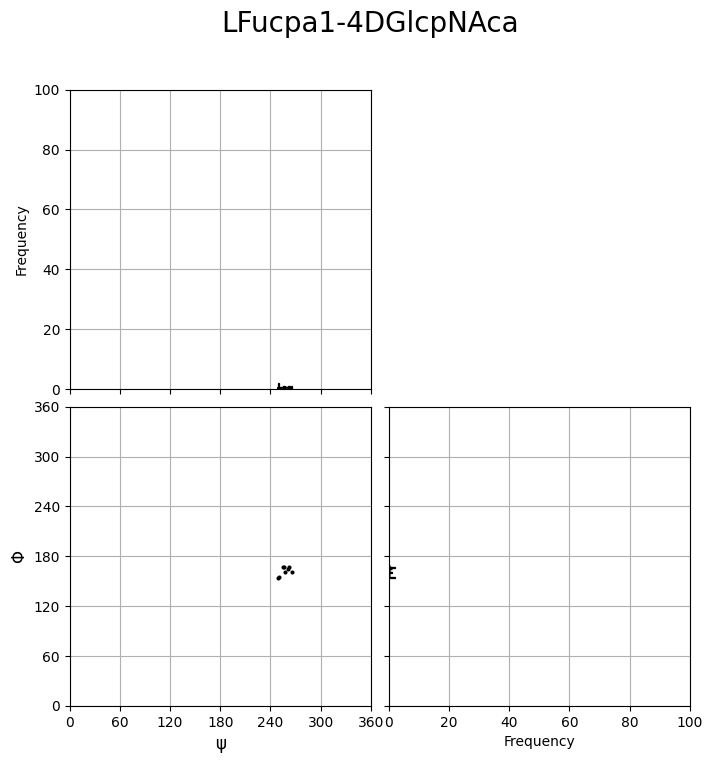

In [34]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)